#### 이미지 인식 데이터 전처리
- 색상이 있는 이미지를 검색.
- 본 파일에서는 딥러닝 하기 전에 이미지 전처리 작업을 함.
- 이미지의 크기가 모두 달라서 머신러닝 및 딥러닝으로 다루기가 어려움.
- 이미지들은 내부적으로 사용하는 색상 체계와 크기 등이 다를 수 있음.
- 이미지의 색상 데이터를 분석해서 수치화 하는 작업.
- 일정한 크기로 새 이미지를 만들고 24bit RGB 컬러 형태로 변환하여, 모든 이미지의 크기와 색감을 통일 시킴.
- 그리고 머신러닝 및 딥러닝을 쉽게 하기 위해 ndarray 형태로 변환하여 이것을 파일로 저장.

In [2]:
import os, glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import tensorflow as tf
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Embedding, LSTM, Activation, Conv1D, MaxPooling1D
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import LeakyReLU, BatchNormalization, Reshape, Input, UpSampling2D
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras_preprocessing.sequence import pad_sequences

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# GPU 사용 초기화 및 할당.
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

import warnings
warnings.filterwarnings('ignore')

In [5]:
# 사용할 이미지가 들어 있는 폴더 위치.
root_dir = 'img/101_new'

# 폴더 이름들을 가져와 결과 데이터로 구성.
a1 = os.walk(root_dir)
categories = list(a1)[0][1]
# categories

# 결과 데이터의 개수를 담음.
nb_classes = len(categories)
nb_classes

102

In [3]:
# 입력과 결과 데이터를 담을 리스트
# 입력 데이터( 이미지 데이터 )
x = []
# 결과 데이터( 폴더 이름을 숫자로 변환한 것 )
y = []

# 제공되는 이미지의 크기가 다양하므로 한가지 사이즈로 변환.
img_w = 64
img_h = 64

for idx, cat in enumerate(categories):
    # 읽어올 이미지 경로 구성.
    image_dir = root_dir + '/' + cat
    # print(image_dir)
    
    # 해당 폴더에 있는 파일 이름을 전부 가져옴.
    files = glob.glob(image_dir + '/*')
    # print(files)
    
    print(f'{cat} 처리중')
    # 파일의 수 만큼 반복.
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((img_w, img_h))
        #  plt.imshow(img)
        #  plt.grid()
        #  plt.show()

        # 이미지 데이터 생성.
        data = np.asarray(img)
        x.append(data)
        y.append(idx)

print('처리 완료')

# ndarray 생성.
x = np.array(x)
y = np.array(y)

# Train data, Test data로 나눔.
x_train, x_test, y_train, y_test = train_test_split(x, y)

# 하나로 합침.
xy = (x_train, x_test, y_train, y_test )
np.save('img/calthec_new.npy', xy)
print(f'저장 완료 : {len(y)}개')

accordion 처리중
airplanes 처리중
anchor 처리중
ant 처리중
BACKGROUND_Google 처리중
barrel 처리중
bass 처리중
beaver 처리중
binocular 처리중
bonsai 처리중
brain 처리중
brontosaurus 처리중
buddha 처리중
butterfly 처리중
camera 처리중
cannon 처리중
car_side 처리중
ceiling_fan 처리중
cellphone 처리중
chair 처리중
chandelier 처리중
cougar_body 처리중
cougar_face 처리중
crab 처리중
crayfish 처리중
crocodile 처리중
crocodile_head 처리중
cup 처리중
dalmatian 처리중
dollar_bill 처리중
dolphin 처리중
dragonfly 처리중
electric_guitar 처리중
elephant 처리중
emu 처리중
euphonium 처리중
ewer 처리중
Faces 처리중
Faces_easy 처리중
ferry 처리중
flamingo 처리중
flamingo_head 처리중
garfield 처리중
gerenuk 처리중
gramophone 처리중
grand_piano 처리중
hawksbill 처리중
headphone 처리중
hedgehog 처리중
helicopter 처리중
ibis 처리중
inline_skate 처리중
joshua_tree 처리중
kangaroo 처리중
ketch 처리중
lamp 처리중
laptop 처리중
Leopards 처리중
llama 처리중
lobster 처리중
lotus 처리중
mandolin 처리중
mayfly 처리중
menorah 처리중
metronome 처리중
minaret 처리중
Motorbikes 처리중
nautilus 처리중
octopus 처리중
okapi 처리중
pagoda 처리중
panda 처리중
pigeon 처리중
pizza 처리중
platypus 처리중
pyramid 처리중
revolver 처리중
rhino 처리중
rooster 

In [13]:
# seed 값 설정.
np.random.seed(3)
tf.random.set_seed(3)

# 전처리 후 저장한 데이터 읽기.
X_train, X_test, Y_train, Y_test = np.load('img/calthec_new.npy', allow_pickle=True)

# 데이터 정규화.( 색상값을 0 ~ 1 사이의 값으로 조정.)
X_train1 = X_train.astype('float') / 256
X_test1  = X_test.astype('float') / 256
print(f' 학습용 데이터 : {X_train1.shape}')
print(f' 검증용 데이터 : {X_test1.shape}')

# 결과 데이터 - 윈핫 인코딩.
Y_train1 = np_utils.to_categorical(Y_train, nb_classes)
Y_test1  = np_utils.to_categorical(Y_test, nb_classes)
print(f' 학습용 데이터 : {Y_train1.shape}')
print(f' 검증용 데이터 : {Y_test1.shape}')

 학습용 데이터 : (6858, 64, 64, 3)
 검증용 데이터 : (2287, 64, 64, 3)
 학습용 데이터 : (6858, 102)
 검증용 데이터 : (2287, 102)


In [5]:
# 모델 설정.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        3

In [6]:
# 모델 컴파일.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 조건.
model_path = 'models/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 중단 조건.
callback2 = EarlyStopping(monitor='val_loss', patience=50)

# 모델 학습.
history = model.fit(X_train1, Y_train1, epochs=1000, batch_size=32, 
                    validation_data=(X_test1, Y_test1), callbacks=[callback1, callback2])

Epoch 1/1000
215/215 [==============================] - 5s 12ms/step - loss: 3.8778 - accuracy: 0.2025 - val_loss: 2.5387 - val_accuracy: 0.4521
Epoch 2/1000
215/215 [==============================] - 2s 10ms/step - loss: 2.3697 - accuracy: 0.4663 - val_loss: 1.8997 - val_accuracy: 0.5523
Epoch 3/1000
215/215 [==============================] - 2s 10ms/step - loss: 1.5598 - accuracy: 0.6117 - val_loss: 1.6906 - val_accuracy: 0.6017
Epoch 4/1000
215/215 [==============================] - 2s 10ms/step - loss: 0.9785 - accuracy: 0.7423 - val_loss: 1.7504 - val_accuracy: 0.6152
Epoch 5/1000
215/215 [==============================] - 2s 9ms/step - loss: 0.5749 - accuracy: 0.8454 - val_loss: 1.8299 - val_accuracy: 0.6126
Epoch 6/1000
215/215 [==============================] - 2s 10ms/step - loss: 0.4492 - accuracy: 0.8734 - val_loss: 1.9549 - val_accuracy: 0.6218
Epoch 7/1000
215/215 [==============================] - 2s 9ms/step - loss: 0.3125 - accuracy: 0.9114 - val_loss: 2.0217 - val_accu

In [14]:
# 학습 model1을 이용한 Test data를 통한 성능 평가.
# Test data를 통한 정확도가 매우 떨어짐. 
# 새로운 데이터에 대하여 학습 능력이 뒤떨어지는 것으로 과소 혹은 과대 적합의 문제가 발생했을 가능성이 다분함.
best_model = load_model('models/모델1.hdf5')
score = best_model.evaluate(X_test1, Y_test1)
print(f'손실 : {score[0]}')
print(f'정확도 : {score[1]}')

72/72 [==============================] - 0s 5ms/step - loss: 1.6906 - accuracy: 0.6017
손실 : 1.690595269203186
정확도 : 0.6016615629196167


In [15]:
# Train data를 통한 성능 평가.
# 나름 괜찮은 성능이 나오고 있음.(이는 당연한 결과)
score2 = best_model.evaluate(X_train1, Y_train1)
print(f'손실 : {score2[0]}')
print(f'정확도 : {score2[1]}')

215/215 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.8574
손실 : 0.695882260799408
정확도 : 0.8573928475379944


#### Result : 위와 같은 문제를 해결하기 위해 이미지 데이터를 좀 더 전처리(변형) 해보도록 한다.

#### 이미지 데이터 부풀리기(변형)

In [9]:
# 폴더의 수 만큼 반복.
root_dir = 'img/101_new/'
x = []
y = []

for idx, cat in enumerate(categories) :
    # 폴더명을 붙힌 경로를 생성.
    image_dir = root_dir + cat
    # print(image_dir)
    
    # 해당 폴더 내의 파일 이름 목록을 가져옴..
    files = glob.glob(image_dir + '/*')
    # print(files)
    
    # 폴더내의 파일 수만큼 반복.
    for i, f in enumerate(files) :
        # 이미지 파일 데이터를 가져옴.
        img = Image.open(f)
        # 색상 체계 변경.
        img = img.convert('RGB')
        # 이미지 크기 변경.
        img = img.resize((img_w, img_h))
        data = np.asarray(img)

        x.append(data)
        y.append(idx)
        
        # -20도에서 20도까지 5씩 증가하며 회전.
        for angle in range(-20, 20, 5) :
            
            # 이미지를 회전.
            img2 = img.rotate(angle)
            data = np.asarray(img2)
            x.append(data)
            y.append(idx)
            
            # 반전시킨 이미지.
            img3 = img2.transpose(Image.FLIP_LEFT_RIGHT)
            data = np.asarray(img3)
            x.append(data)
            y.append(idx)

x = np.array(x)
y = np.array(y)

In [10]:
# Train data, Test data로 나눔.
x_train, x_test, y_train, y_test = train_test_split(x, y)

# 하나로 결합.
xy = (x_train, x_test, y_train, y_test )
np.save('img/calthec_new2.npy', xy)
print(f'저장 완료 : {len(y)}개')

저장 완료 : 155465개


#### Memory Error 문제로 Restart 후 이 부분부터 다시 시작 

In [16]:
# seed 값 설정.
np.random.seed(3)
tf.random.set_seed(3)

# 전처리 후 저장한 데이터 읽기.
X_train, X_test, Y_train, Y_test = np.load('img/calthec_new2.npy', allow_pickle=True)

# 데이터 정규화.( 색상값을 0 ~ 1 사이의 값으로 조정.)
X_train2 = X_train.astype('float') / 256
X_test2  = X_test.astype('float') / 256
print(f' 학습용 데이터 : {X_train2.shape}')
print(f' 검증용 데이터 : {X_test2.shape}')

# 결과 데이터 - 윈핫 인코딩.
Y_train2 = np_utils.to_categorical(Y_train, nb_classes)
Y_test2  = np_utils.to_categorical(Y_test, nb_classes)
print(f' 학습용 데이터 : {Y_train2.shape}')
print(f' 검증용 데이터 : {Y_test2.shape}')

 학습용 데이터 : (116598, 64, 64, 3)
 검증용 데이터 : (38867, 64, 64, 3)
 학습용 데이터 : (116598, 102)
 검증용 데이터 : (38867, 102)


In [7]:
# 모델 설정.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [8]:
# 모델 컴파일.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 조건.
model_path = 'models/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 중단 조건.
callback2 = EarlyStopping(monitor='val_loss', patience=30)

# 모델 학습.
history = model.fit(X_train2, Y_train2, epochs=1000, batch_size=32, 
                    validation_data=(X_test2, Y_test2), callbacks=[callback1, callback2])

Epoch 1/1000
3644/3644 [==============================] - 62s 15ms/step - loss: 2.3275 - accuracy: 0.4704 - val_loss: 0.6944 - val_accuracy: 0.8174
Epoch 2/1000
3644/3644 [==============================] - 35s 10ms/step - loss: 0.8440 - accuracy: 0.7648 - val_loss: 0.3279 - val_accuracy: 0.9051
Epoch 3/1000
3644/3644 [==============================] - 35s 10ms/step - loss: 0.5626 - accuracy: 0.8360 - val_loss: 0.2494 - val_accuracy: 0.9310
Epoch 4/1000
3644/3644 [==============================] - 35s 10ms/step - loss: 0.4498 - accuracy: 0.8693 - val_loss: 0.1838 - val_accuracy: 0.9469
Epoch 5/1000
3644/3644 [==============================] - 35s 10ms/step - loss: 0.4023 - accuracy: 0.8832 - val_loss: 0.1317 - val_accuracy: 0.9613
Epoch 6/1000
3644/3644 [==============================] - 35s 9ms/step - loss: 0.3645 - accuracy: 0.8944 - val_loss: 0.1268 - val_accuracy: 0.9636
Epoch 7/1000
3644/3644 [==============================] - 35s 9ms/step - loss: 0.3485 - accuracy: 0.9011 - val_lo

In [9]:
# 학습 model2를 이용한 Test data를 통한 성능 평가.
# 이미지를 변형시킨 이미지 데이터에 대한 성능이 매우 높게 나오는 것을 알 수 있음.
best_model2 = load_model('models/모델2.hdf5')
score2 = best_model2.evaluate(X_test2, Y_test2)
print(f'손실 : {score2[0]}')
print(f'정확도 : {score2[1]}')

1215/1215 [==============================] - 5s 3ms/step - loss: 0.1084 - accuracy: 0.9748
손실 : 0.10841735452413559
정확도 : 0.9747600555419922


In [10]:
# Train data를 통한 성능 평가.
# 매우 좋은 성능을 갖추고 있음을 알 수 있음.(이는 당연한 결과)
score2 = best_model2.evaluate(X_train2, Y_train2)
print(f'손실 : {score2[0]}')
print(f'정확도 : {score2[1]}')

3644/3644 [==============================] - 13s 3ms/step - loss: 0.0086 - accuracy: 0.9976
손실 : 0.00855712965130806
정확도 : 0.997581422328949


#### Test dataset을 이용한 모델 성능 평가 비교.

In [20]:
print('< 변형된 이미지가 없는 데이터를 학습한 모델 >')
best_model = load_model('models/모델1.hdf5')
score = best_model.evaluate(X_test1, Y_test1)
print(f'오차률 : {round(score[0], 3)*100}%')
print(f'정확도 : {round(score[1], 3)*100}%')
# 검증 데이터를 통한 정확도가 매우 떨어짐.

print('-'*90)
print('< 변형된 이미지가 있는 데이터를 학습한 모델 >')
best_model2 = load_model('models/모델2.hdf5')
score2 = best_model2.evaluate(X_test2, Y_test2)
print(f'오차률 : {round(score2[0], 3)*100}%')
print(f'정확도 : {round(score2[1], 3)*100}%')

< 변형된 이미지가 없는 데이터를 학습한 모델 >
72/72 [==============================] - 0s 3ms/step - loss: 1.6906 - accuracy: 0.6017
오차률 : 169.1%
정확도 : 60.199999999999996%
------------------------------------------------------------------------------------------
< 변형된 이미지가 있는 데이터를 학습한 모델 >
1215/1215 [==============================] - 4s 3ms/step - loss: 0.1084 - accuracy: 0.9748
오차률 : 10.8%
정확도 : 97.5%


lobster
----------------------------------------------------------------------


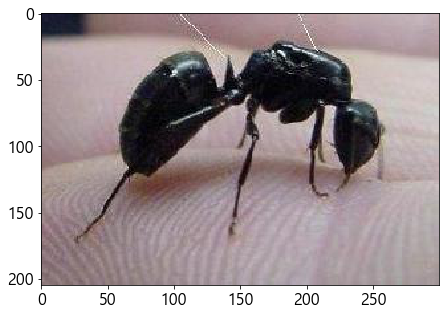

pyramid
----------------------------------------------------------------------


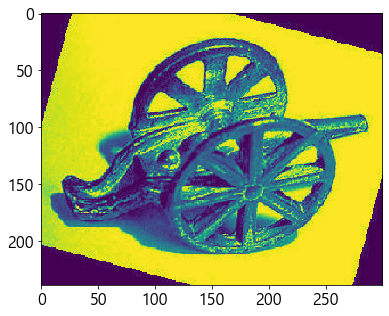

headphone
----------------------------------------------------------------------


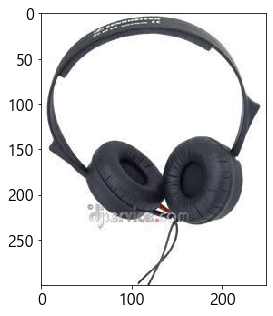

chair
----------------------------------------------------------------------


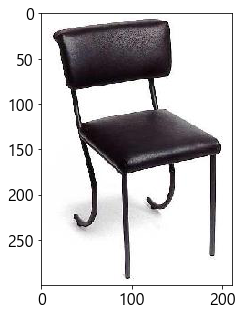

accordion
----------------------------------------------------------------------


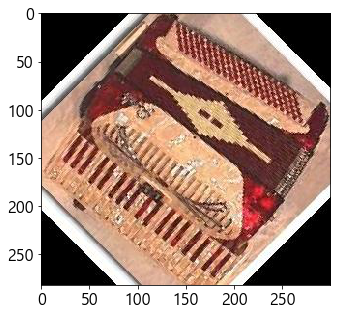

brain
----------------------------------------------------------------------


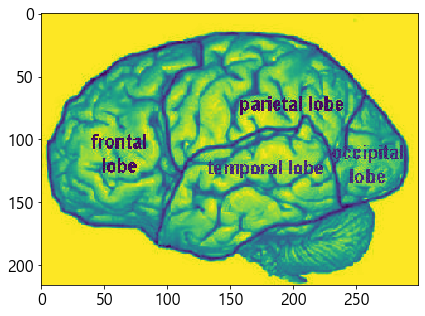

wrench
----------------------------------------------------------------------


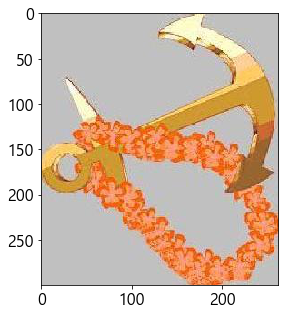

BACKGROUND_Google
----------------------------------------------------------------------


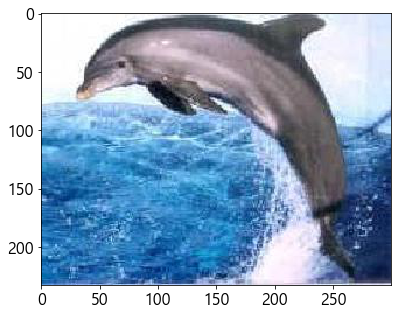

butterfly
----------------------------------------------------------------------


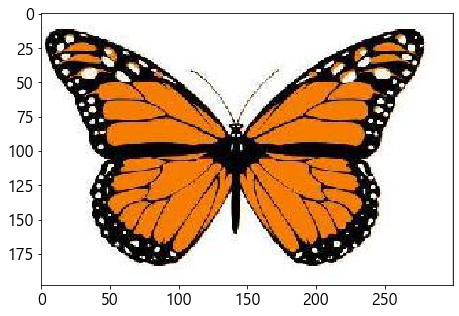

BACKGROUND_Google
----------------------------------------------------------------------


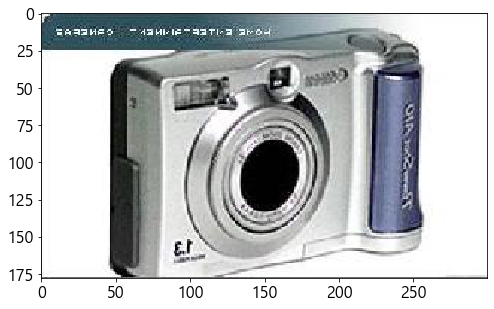

crab
----------------------------------------------------------------------


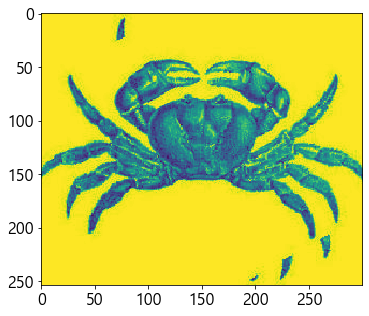

euphonium
----------------------------------------------------------------------


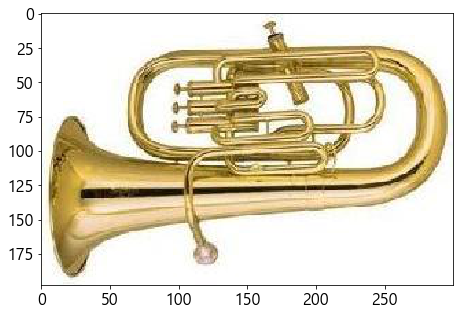

In [24]:
# 예측할 이미지 목록.
file_List =glob.glob('img/101_test/*')
# print(file_List)

# 입력 이미지 전처리.
xx = []
files = []
for fname in file_List :
    img =Image.open(fname)
    img = img.convert('RGB')
    img = img.resize((64, 64))
    in_data = np.asarray(img)
    xx.append(in_data)
    files.append(fname)
    
xx = np.array(xx)

# 이미지 변형을 진행한 model2로부터 예측 결과 가져옴.
pred = best_model2.predict(xx)    
pred2 = np.argmax(pred, axis=1)

# 결과 확인.
# 대체로 잘 분류하고 있는 모습을 알수 있음. 단 배경이 있는 사진은 대체로 사물, 물체 등을 인지하지 못하는 양상을 보임.
for i, fname in enumerate(files):
    img = Image.open(fname)
    
    # 예측 결과 확인.
    idx = pred2[i]
    print(categories[idx])
    
    print('-'*70)
    plt.figure(figsize=(8,5))
    plt.imshow(img)
    plt.show()